In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Life-cycle_greenhouse_gas_emissions_of_energy_sources')[-2]
df.columns = ['Technology', 'Class', 'gCO2eq/kWh']

In [5]:
df = df.loc[~df['Class'].str.contains("with CCS")]

In [6]:
df.groupby(by='Technology').describe()

gCO2eq/kWh                                                       \
                 count        mean        std    min     25%    50%     75%   
Technology                                                                    
CSP                2.0   32.000000  14.142136   22.0   27.00   32.0   37.00   
Hard coal          3.0  933.333333  76.376262  850.0  900.00  950.0  975.00   
Hydro              2.0   80.500000  98.287843   11.0   45.75   80.5  115.25   
Natural gas        1.0  430.000000        NaN  430.0  430.00  430.0  430.00   
Nuclear            1.0    5.100000        NaN    5.1    5.10    5.1    5.10   
PV                 6.0   21.000000  12.473973   11.0   12.50   14.5   31.50   
Wind               3.0   13.000000   1.000000   12.0   12.50   13.0   13.50   

                     
                max  
Technology           
CSP            42.0  
Hard coal    1000.0  
Hydro         150.0  
Natural gas   430.0  
Nuclear         5.1  
PV             37.0  
Wind           14.0

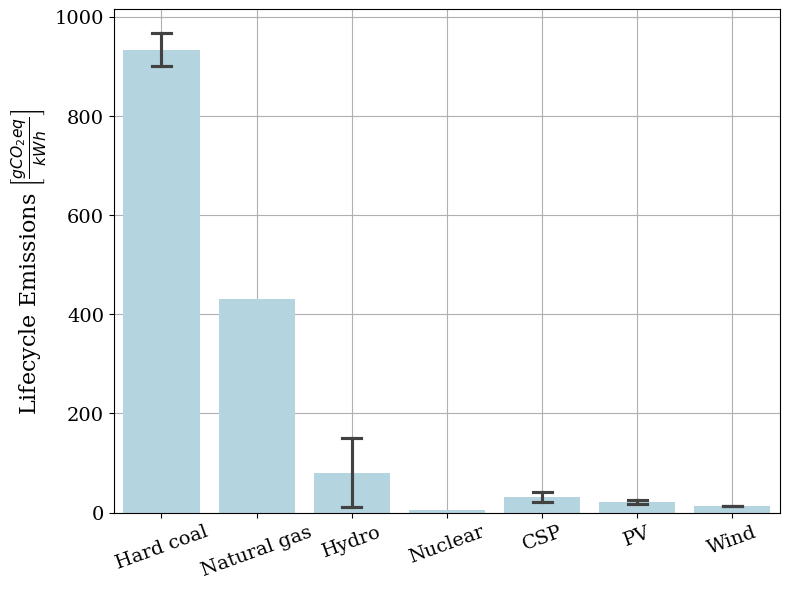

In [13]:
import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"

plt.figure(figsize=(8, 6), facecolor='w')

# plot a bar chart
ax = sb.barplot(x="Technology", y="gCO2eq/kWh", data=df, estimator=np.mean, 
                errorbar=('ci',65), capsize=.2, color='lightblue',
                zorder=2)
ax.set_ylabel(r'Lifecycle Emissions $\left[\frac{{gCO}_{2}eq}{kWh}\right]$',
              fontsize=16)
ax.set_xlabel('')
ax.grid(zorder=0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=20)
plt.tight_layout()
# ax.arrow(x=1.25,y=600, dx=0.75*3, dy=-400, width=0.4, shape='full', head_length=40)
# prop = dict(facecolor='black', shrink=0.05)
# prop = dict(arrowstyle="<|-,head_width=0.4,head_length=0.8",#,tail_width=0.4",
#             shrinkA=0,shrinkB=0,facecolor='k')
# ax.annotate("", xy=(1.24,600),xycoords='data', xytext=(4.25,200), textcoords='data', arrowprops=prop)
plt.show()
# plt.savefig("../../docs/figures/emissions-by-source.pgf")